# Question 1 
Build a classification model to predict whether an email is spam or not.
# Answer

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import joblib


In [11]:
# Load the dataset
df = pd.read_csv("File_mail_data.csv")
df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
# Split the dataset into features and labels
X = df["Message"]
y = df["Category"]

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Build the models
models = [
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Support Vector Machine", SVC()),
    ("Random Forest", RandomForestClassifier())
]

Accuracy for Multinomial Naive Bayes: 0.9650224215246637


Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115





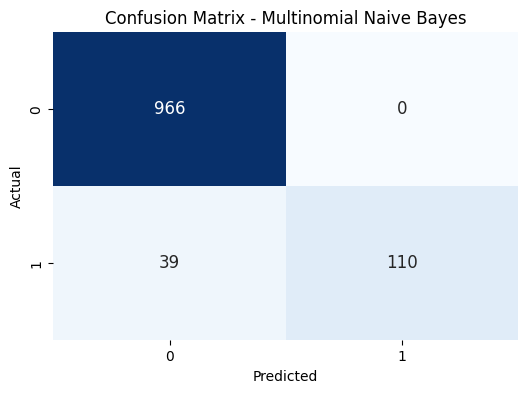

Accuracy for Support Vector Machine: 0.989237668161435


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115





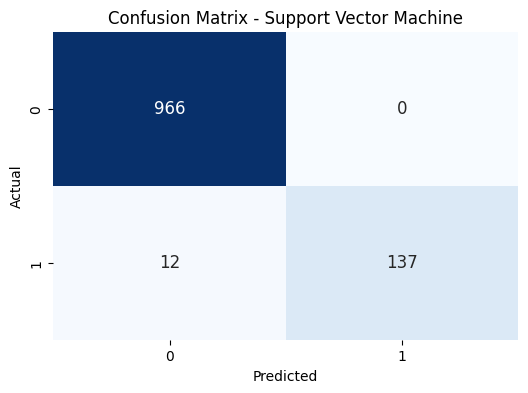

Accuracy for Random Forest: 0.9775784753363229


Classification Report for Random Forest:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115





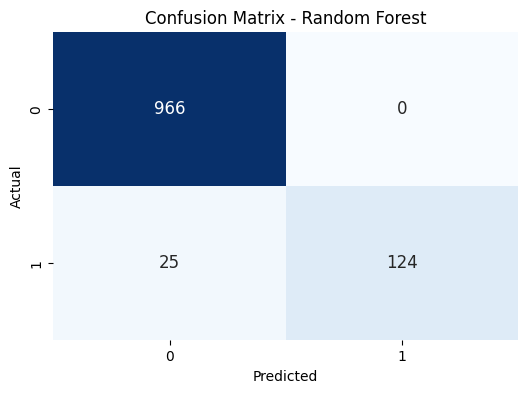

In [18]:
# Create a dictionary to store the model accuracies
model_accuracies = {}

for model_name, model in models:
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

 # Predict on the testing data   
    y_pred = pipeline.predict(X_test)

# Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

# Store the accuracy in the dictionary
    model_accuracies[model_name] = accuracy

# Print the model accuracy
    print(f"Accuracy for {model_name}: {accuracy}")
    print("\n")
# Print the classification report   
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")        
# Plot the confusion matrix as a heatmap    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.title(f"Confusion Matrix - {model_name}")
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, annot_kws={"fontsize": 12})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [19]:
# Find the best performing model
best_model = max(model_accuracies, key=model_accuracies.get)
print("The best performing model is ",best_model)

The best performing model is  Support Vector Machine


In [20]:
# Save the best performing model using joblib
joblib.dump(pipeline, f" {best_model}_model.pkl")


[' Support Vector Machine_model.pkl']

# Question 2
add labels and a title to a Matplotlib scatter plot?
# Answer

In [23]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df2=pd.read_csv("File_gender_classification_v7.csv")
df2

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [25]:
df2.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

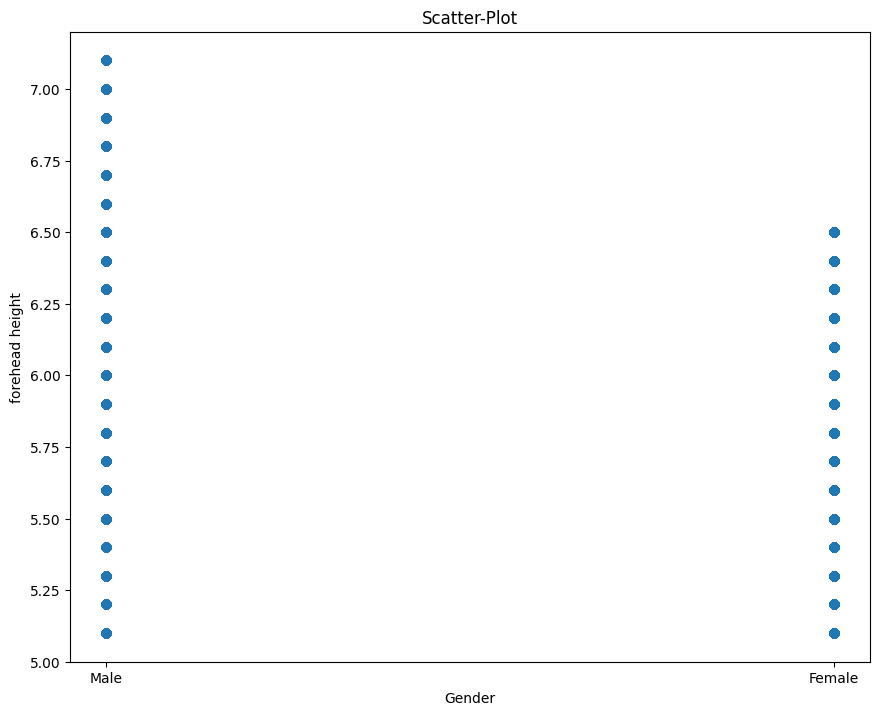

In [30]:
figure=plt.figure(figsize=(10,9))
axes=figure.add_axes([0.1,0.1,0.8,0.7])
axes.scatter(df2["gender"],df2["forehead_height_cm"])
axes.set_xlabel("Gender")
axes.set_ylabel("forehead height")
axes.set_title("Scatter-Plot")
plt.show()

# Using Dictionary to create a Dataset for the plotting of Matplotlib scatter plot

   Days Of The Week          Name  Gender Phone Number Products       Games   Price
1            Monday          Paul    Male    080456666  SamSung      soccer  500000
2            Monday         Peter    Male     08000003  SamSung      soccer  150000
3           Tuesday         James    Male    070006000   Iphone      soccer  250000
4           Tuesday       Matthew    Male    090670000   Iphone      soccer  350000
5           Tuesday  Mrs Anderson  Female     09125600  SamSung  long tenis  400000
6         Wednesday       Levinus    Male    091343400  SamSung      soccer   15000
7          Thursday         Amaka  Female    081308850   Iphone  long tenis   30000
8          Thursday      Mrs Aliu  Female     08155674   Iphone  long tenis  550000
9            Friday      Damilola    Male     07033909   Iphone      soccer  250000
10         Saturday         Ekene  Female     07045300  SamSung  long tenis    7000


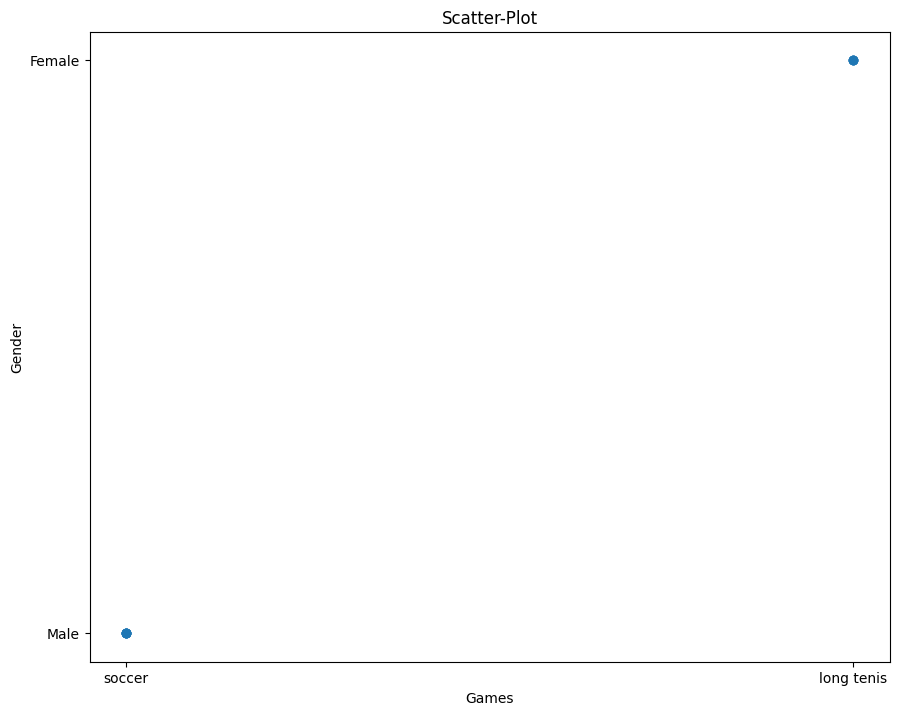

In [31]:
import pandas as pd
# Using Dictionary to create a Dataset for the plotting of Matplotlib scatter plot
DataSet={
    "Days Of The Week":["Monday", "Monday", "Tuesday","Tuesday","Tuesday","Wednesday","Thursday","Thursday","Friday","Saturday"],
    "Name":["Paul","Peter","James","Matthew","Mrs Anderson","Levinus","Amaka","Mrs Aliu","Damilola","Ekene"],
    "Gender": ["Male","Male","Male","Male","Female","Male","Female","Female","Male","Female"],
    "Phone Number":["080456666","08000003","070006000","090670000","09125600","091343400","081308850","08155674","07033909","07045300"],
    "Products":["SamSung","SamSung","Iphone","Iphone","SamSung","SamSung","Iphone","Iphone","Iphone","SamSung"],
    "Games":["soccer","soccer","soccer","soccer","long tenis","soccer","long tenis","long tenis","soccer","long tenis",],
    "Price":["500000","150000","250000","350000","400000","15000","30000","550000","250000","7000"]
}
df = pd.DataFrame(DataSet, index = ["1", "2", "3","4","5","6","7","8","9","10"])

# print df
print(df.to_string())

# Before plotting first import matplotlib.pyplot
import matplotlib.pyplot as plt

# plot Show x and y labels and title
figure=plt.figure(figsize=(10,9))
axes=figure.add_axes([0.1,0.1,0.8,0.7])
axes.scatter(df["Games"],df["Gender"])
axes.set_xlabel("Games")
axes.set_ylabel("Gender")
axes.set_title("Scatter-Plot")
plt.show()

# Question 3
Create a NumPy array with a specific pattern, like a checkerboard.
# Answer

In [34]:
# importing numpy library 
import numpy as np

In [35]:
#Give the checkerboard size
# The checkerboard size for rows and columns; rows=10,coloumns=10
row,column=10,10

In [36]:
# the array is filled with 1's
arr=np.ones((row,column))
arr

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [37]:
# the array is filled with 0's and 1's
arr[::2,::2] = 0
arr

array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [38]:
# the array is filled with 0's, 1's and 1's, 0's
arr[1::2,1::2]= 0
arr

array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])

# Question 4
How do you perform element-wise multiplication on two NumPy arrays
# Answer

In [39]:
import numpy as np

In [42]:
# create two numpy arrays
arr1=np.array([50,70,60])

In [43]:
arr2=np.array([57,80,40])
#Element wise multiplication

In [44]:
arr_product=arr1*arr2
arr_product

array([2850, 5600, 2400])

# Question 5
calculate the mean and standard deviation of a NumPy array?
# Answer

In [ ]:
import numpy as np

In [48]:
arr=np.array([1,2,3,4])
arr_mean=np.mean(arr)
arr_mean

2.5

In [47]:
arr_std=np.std(arr)
arr_std

1.118033988749895